# Page View Time Series Visualizer

**This notebook addresses project 4 of the course at freecodecamp.org**
> https://www.freecodecamp.org/learn/data-analysis-with-python/data-analysis-with-python-projects/page-view-time-series-visualizer

<div><section id="instructions">
<p>For this project you will visualize time series data using a line chart, bar chart, and box plots. You will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help you understand the patterns in visits and identify yearly and monthly growth.</p>

#### Tasks

Use the data to complete the following tasks

---

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

> ##### 1. Use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the <code>date</code> column. Clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset

In [2]:
df = pd.read_csv('resources/fcc-forum-pageviews.csv', index_col='date', parse_dates=True, date_format='%Y-%m-%d')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1304 entries, 2016-05-09 to 2019-12-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   value   1304 non-null   int64
dtypes: int64(1)
memory usage: 20.4 KB


,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933


In [3]:
# Filter out the days when page views were in the top 2.5% and in the in the bottom 2.5%
df = df[(df['value'] <= df['value'].quantile(0.975)) & (df['value'] >= df['value'].quantile(0.025))]

> ##### 2. Create a plot that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". 

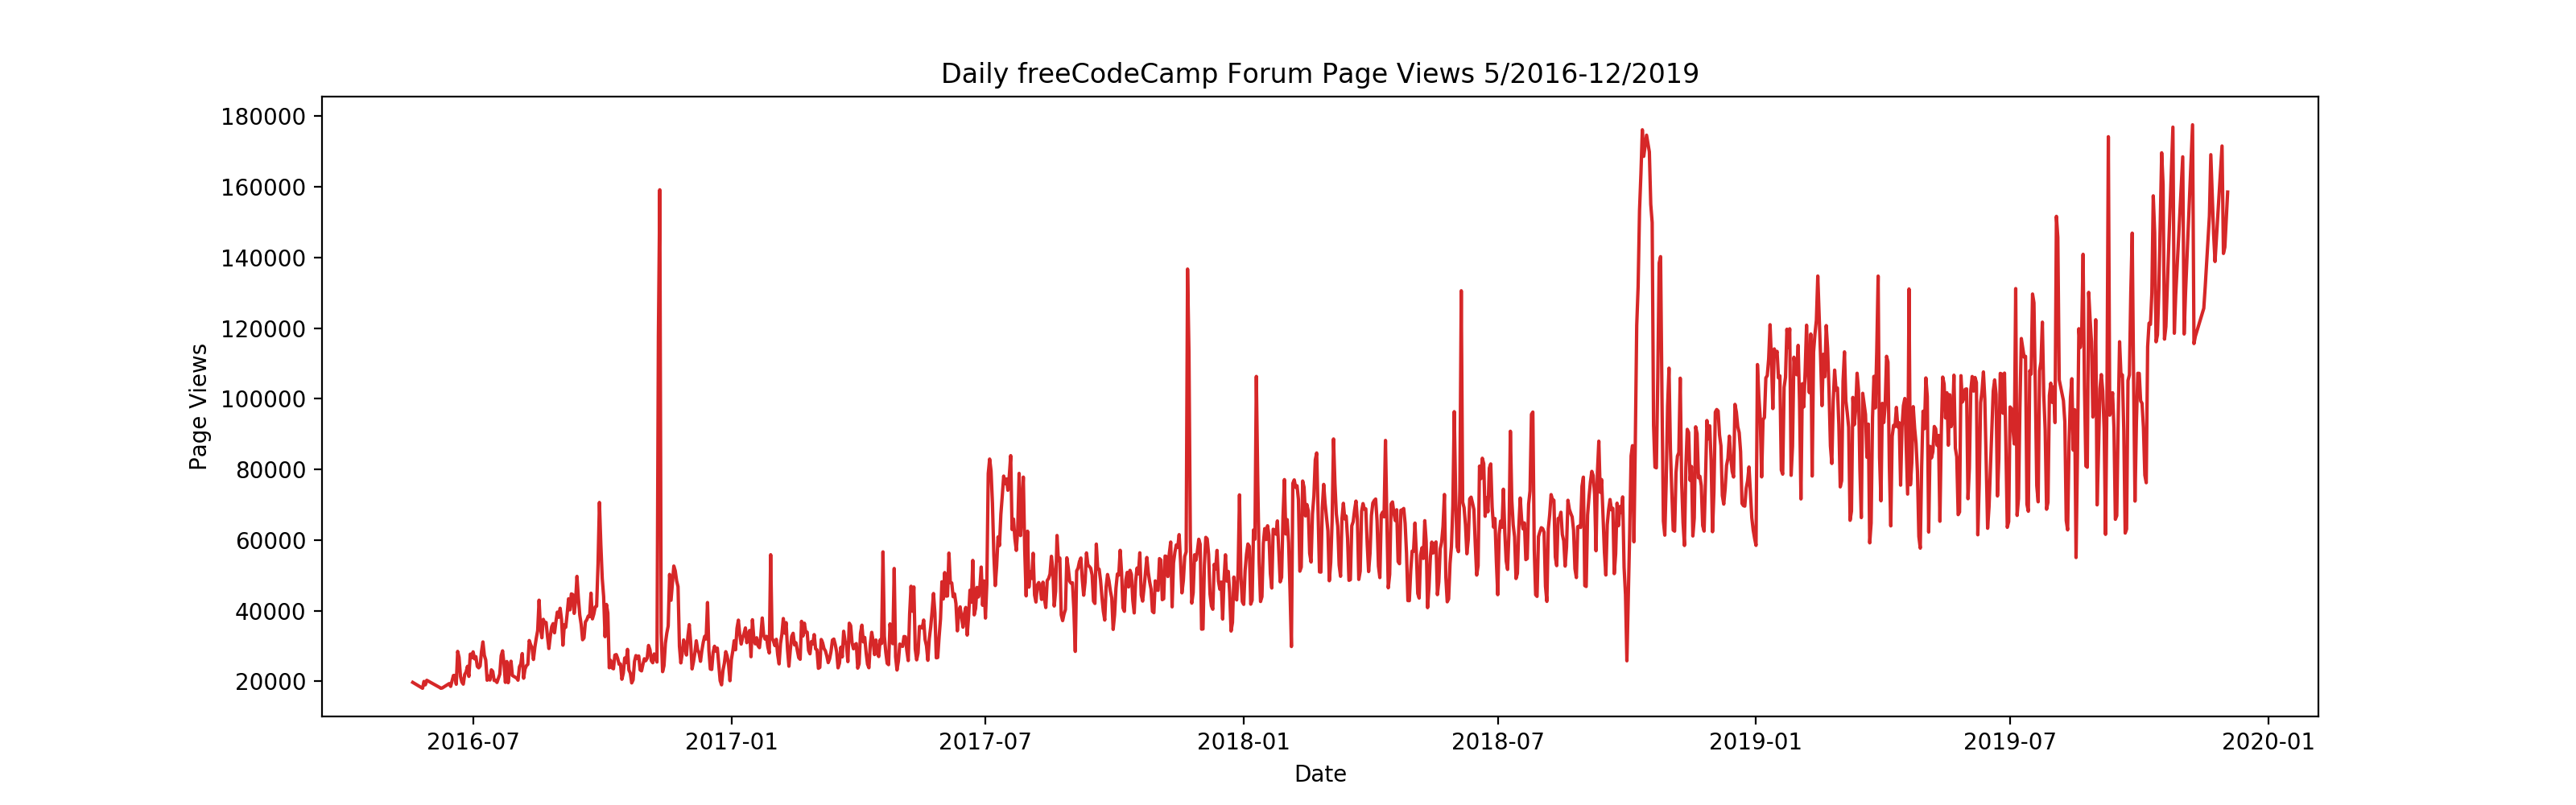

The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views

[Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019'),
 Text(0.5, 0, 'Date'),
 Text(0, 0.5, 'Page Views')]

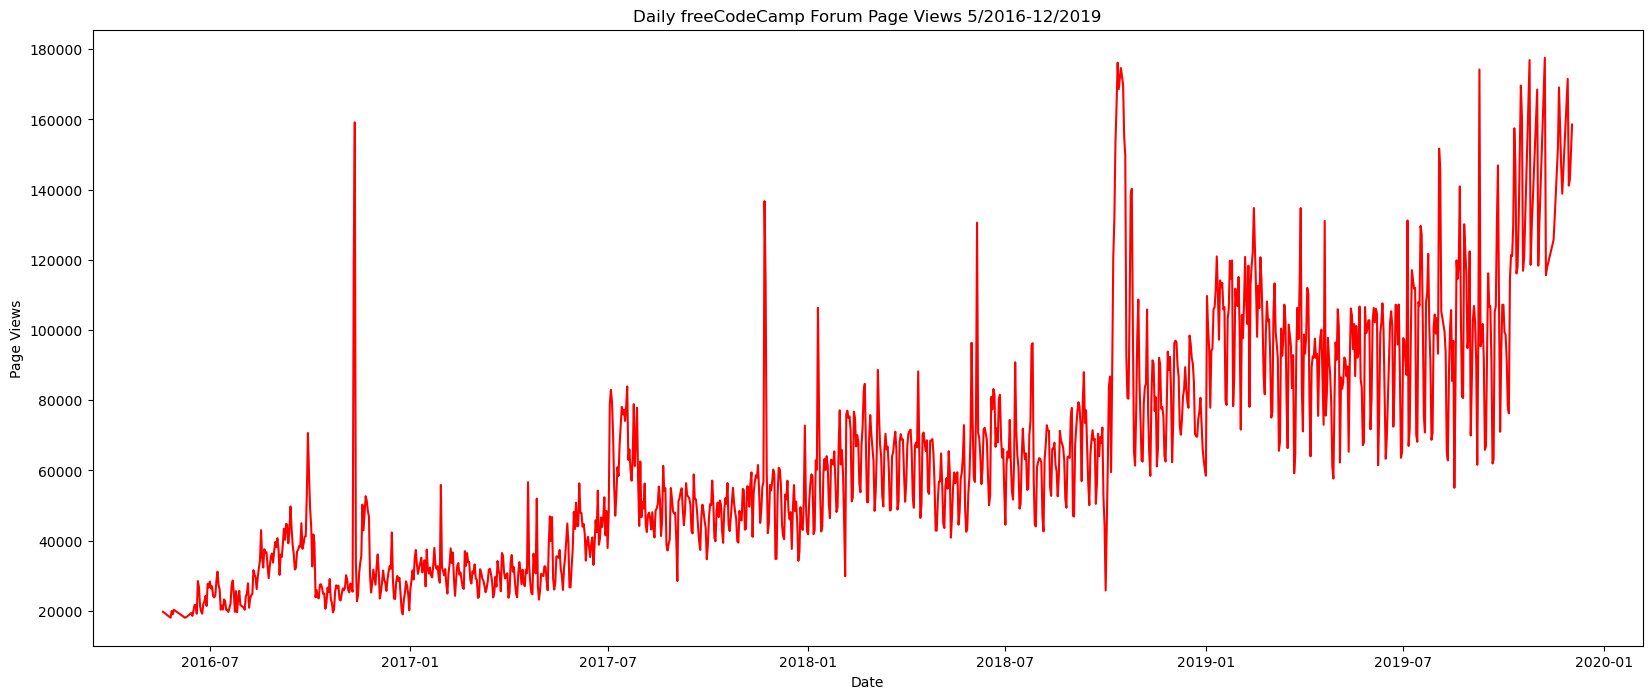

In [4]:
fig, axes = plt.subplots(figsize=(20, 8))
axes.plot(df.index, df.values, color='red')
axes.set(title='Daily freeCodeCamp Forum Page Views 5/2016-12/2019', xlabel='Date', ylabel='Page Views')

> ##### 3. Create a plot that draws a bar chart similar to "examples/Figure_2.png". 

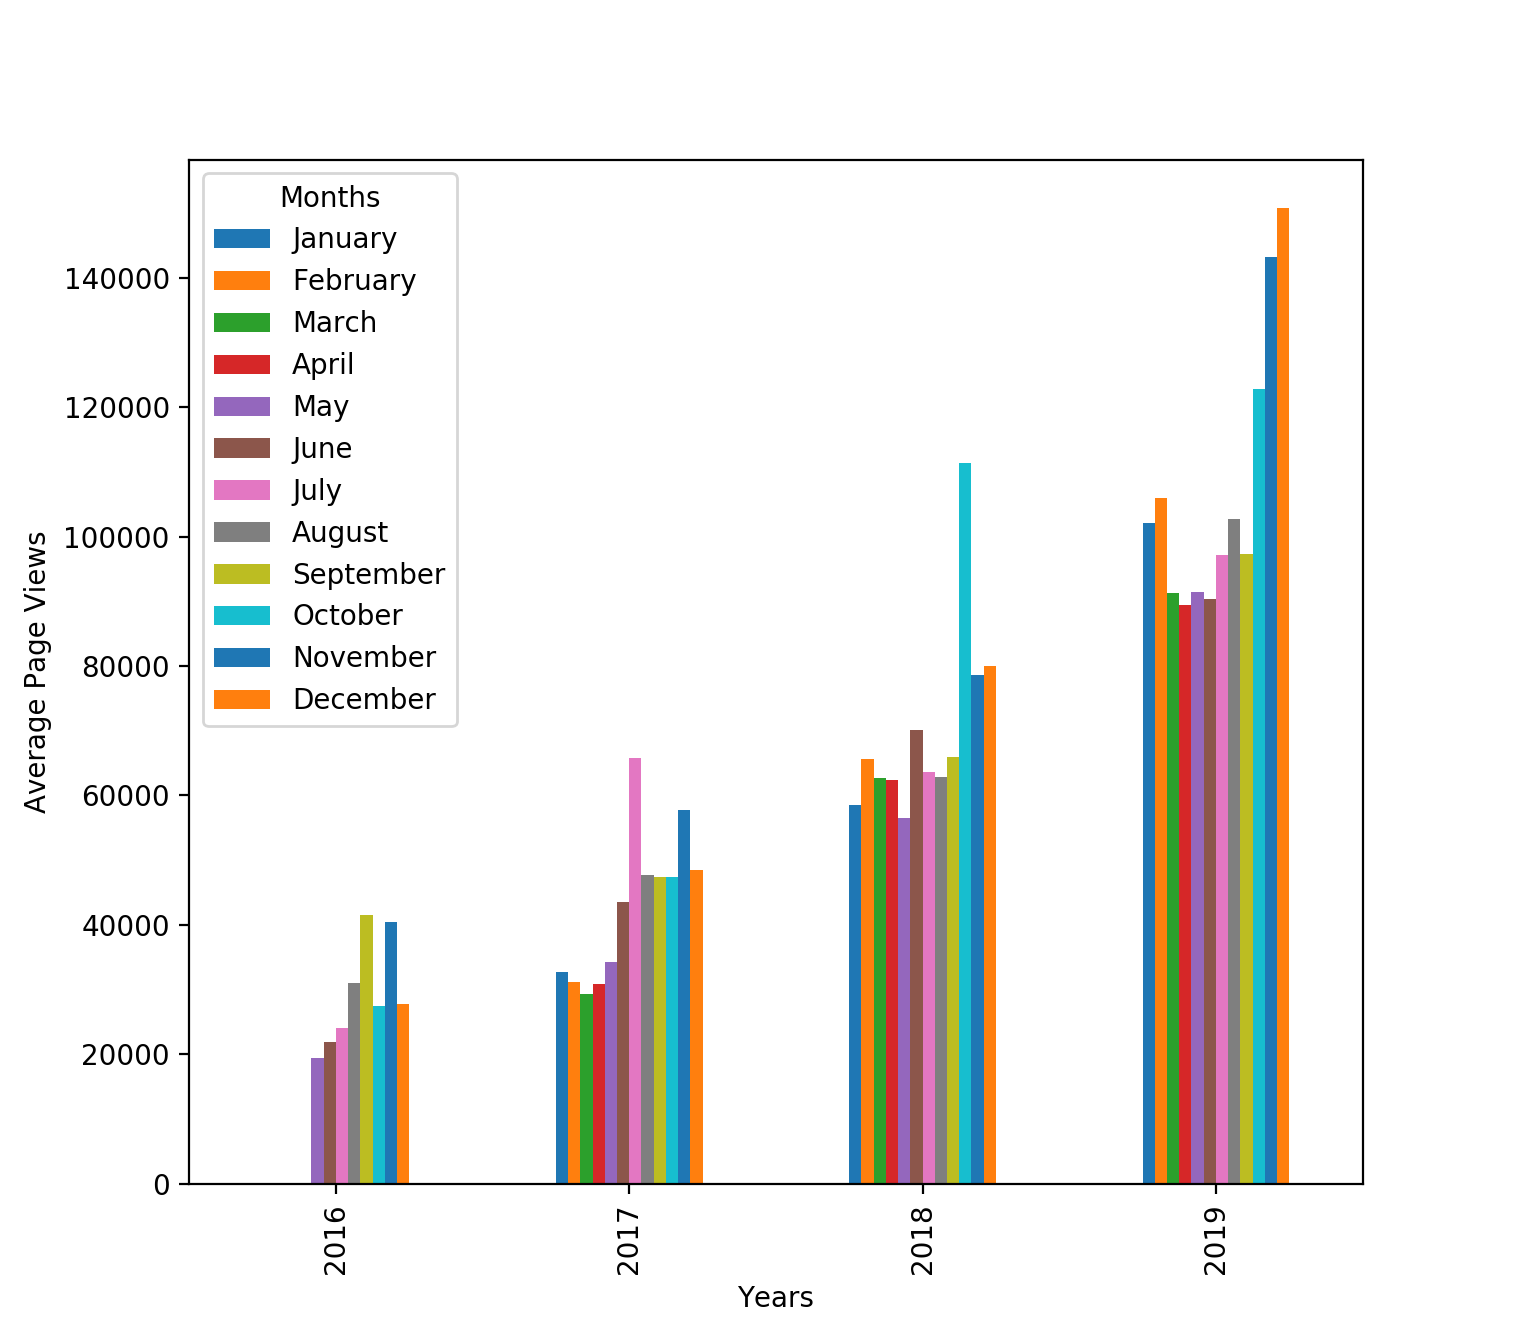

It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.


In [5]:
# Extract year and month from the date index
df['year'] = df.index.year
df['month'] = [d.strftime('%B') for d in df.index]

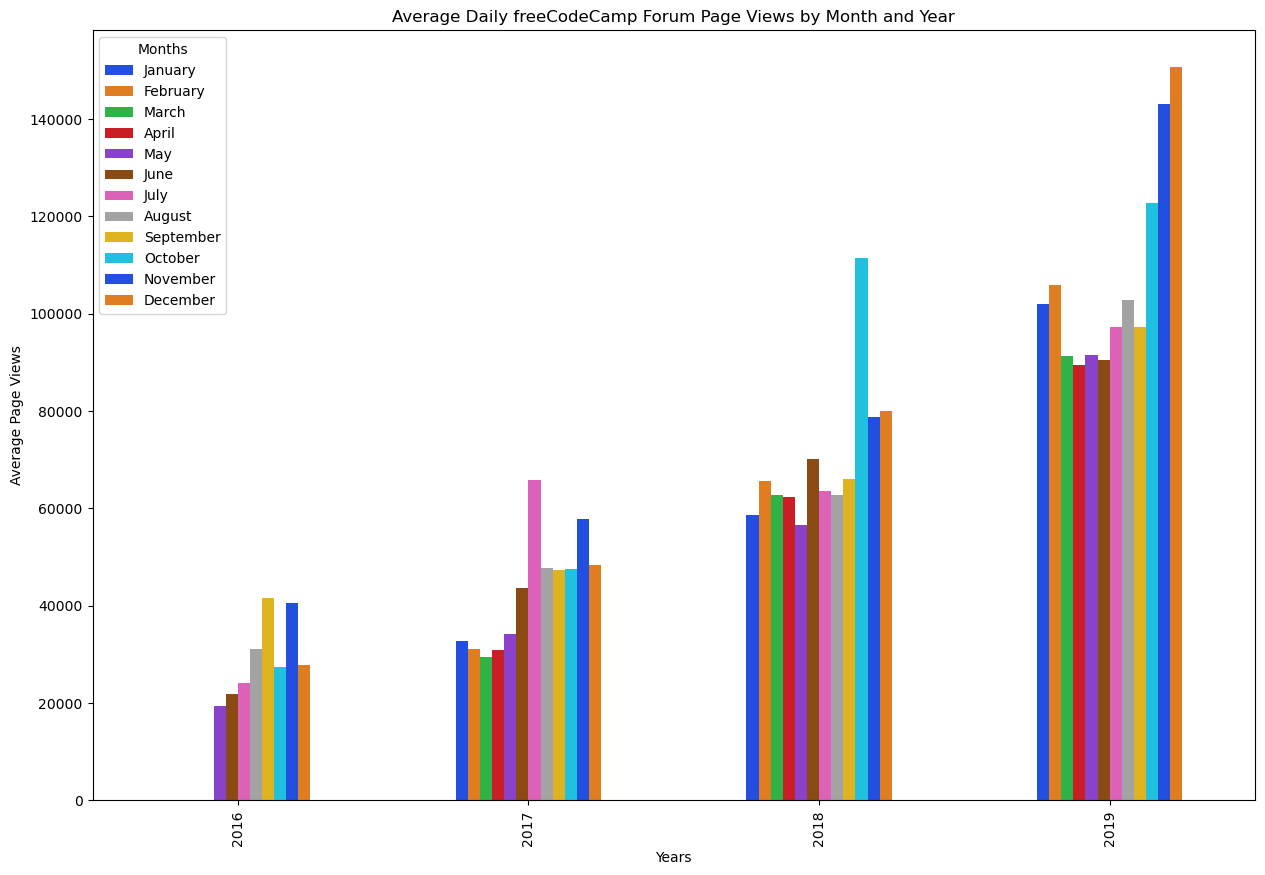

In [6]:
# Group the data by year and month and calculate the average
df_grouped = df.groupby(['year', 'month']).mean().reset_index()

# Create the grouped bar plot
fig, axes = plt.subplots(figsize=(15, 10))

# Define a custom color palette
months_hue_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
sns.barplot(x='year', y='value', hue='month', hue_order=months_hue_order, data=df_grouped, ax=axes, palette='bright', width=0.5)
axes.set(title='Average Daily freeCodeCamp Forum Page Views by Month and Year', xlabel='Years', ylabel='Average Page Views')

# Set the legend title
axes.legend(title='Months', bbox_to_anchor=(0, 1), loc='upper left')
axes.set_xticklabels(axes.get_xticklabels(), rotation=90)

figura = fig
plt.show()

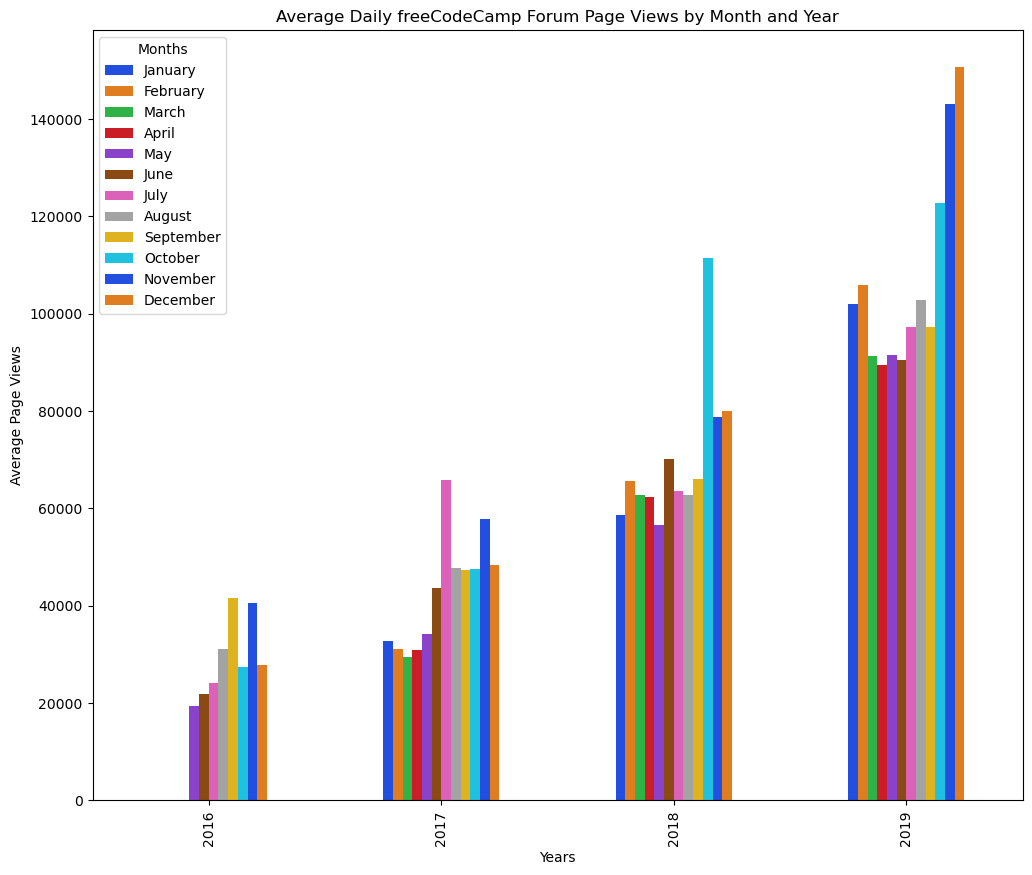

In [7]:
# Copy and modify data for monthly bar plot
df_bar = df.copy()
df_bar.reset_index(inplace=True)
df_bar['year'] = [d.year for d in df_bar.date]
df_bar['month'] = [d.strftime('%B') for d in df_bar.date]

# Draw bar plot
# Group the data by year and month and calculate the average

# Create the grouped bar plot
df_grouped = df_bar.groupby(['year', 'month']).mean().reset_index()

fig, ax = plt.subplots(figsize=(12, 10))

months_hue_order = [
    'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August',
    'September', 'October', 'November', 'December'
]
sns.barplot(x='year',
            y='value',
            hue='month',
            hue_order=months_hue_order,
            data=df_grouped,
            ax=ax,
            palette='bright',
            width=0.5)
ax.set(title='Average Daily freeCodeCamp Forum Page Views by Month and Year',
        xlabel='Years',
        ylabel='Average Page Views')

# Set the legend title
ax.legend(title='Months', bbox_to_anchor=(0, 1), loc='upper left')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
figura = fig

> ##### 4. Create a plot that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". 

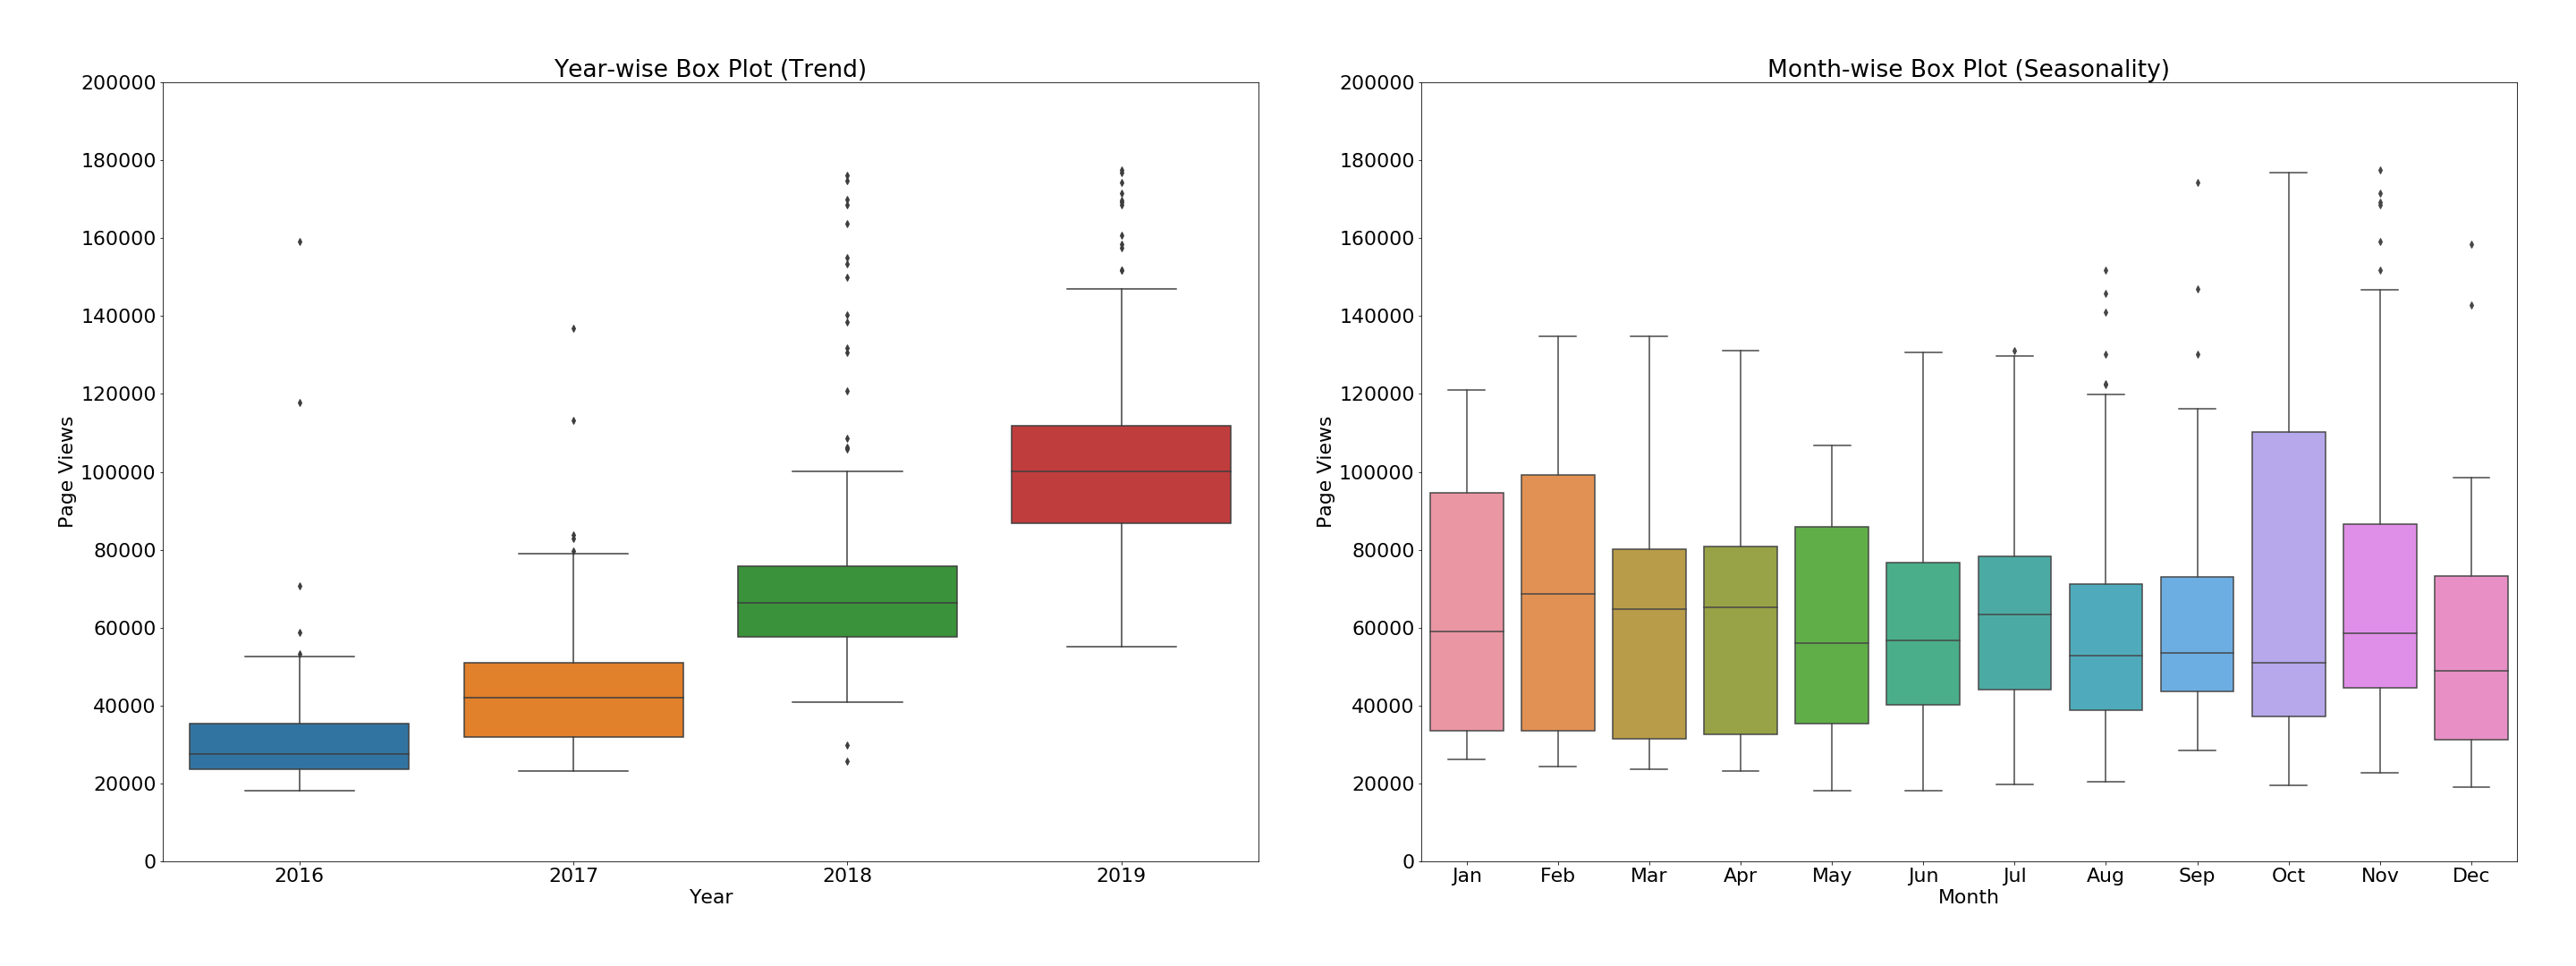

These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly.

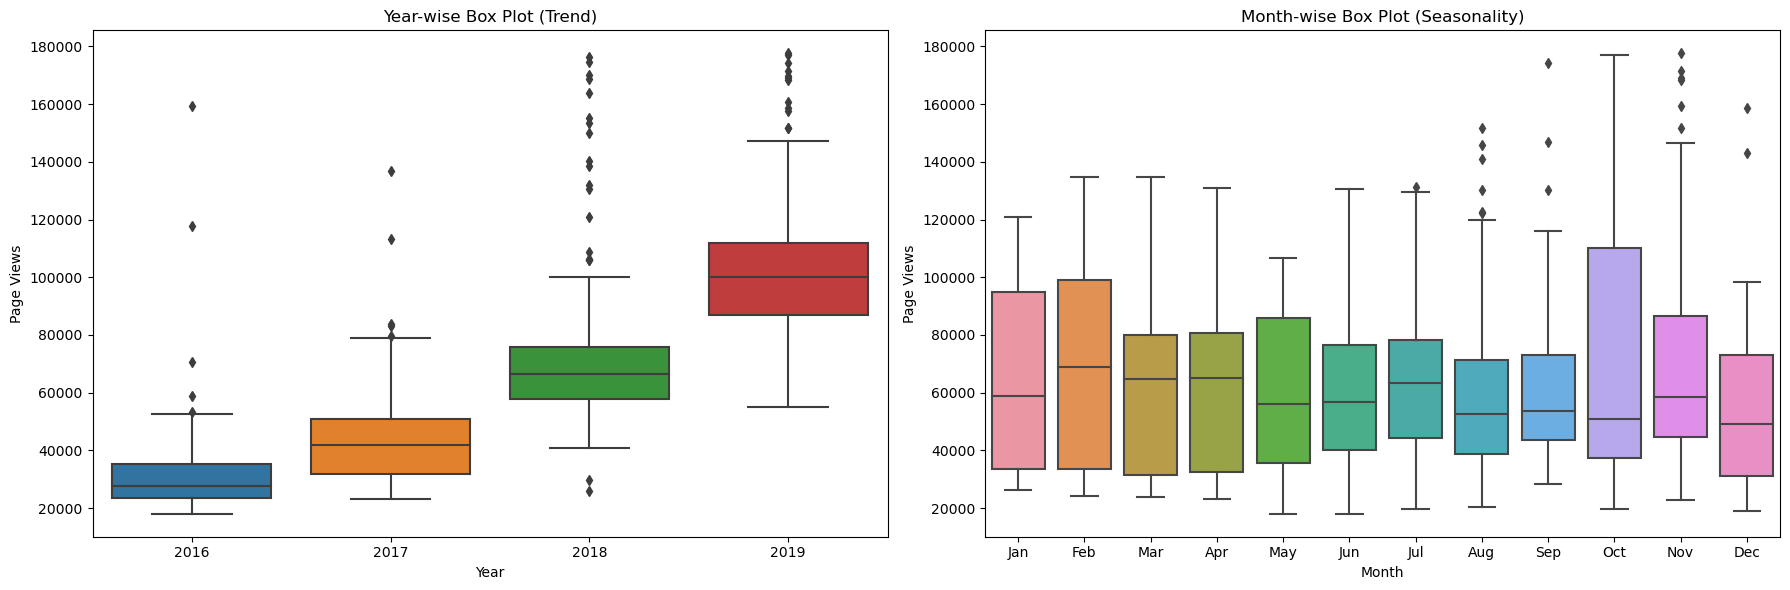

In [8]:
import seaborn as sns

# Prepare data for box plots (this part is done!)
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]

# Create the figure and axes
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# Year-wise box plot
sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
axes[0].set_title('Year-wise Box Plot (Trend)')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Page Views')

# Month-wise box plot
months_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
sns.boxplot(x='month', y='value', order=months_order, data=df_box, ax=axes[1])
axes[1].set_title('Month-wise Box Plot (Seasonality)')
axes[1].set_xlabel('Month')
axes[1].set_ylabel('Page Views')

# Adjust the layout
plt.tight_layout()

# Display the plot
plt.show()